<a href="https://colab.research.google.com/github/LeDucDiLac/pandas_exercises/blob/master/07_Visualization/Chipotle/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [55]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url,delimiter ="\t")

### Step 4. See the first 10 entries

In [56]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 5. Create a histogram of the top 5 items bought

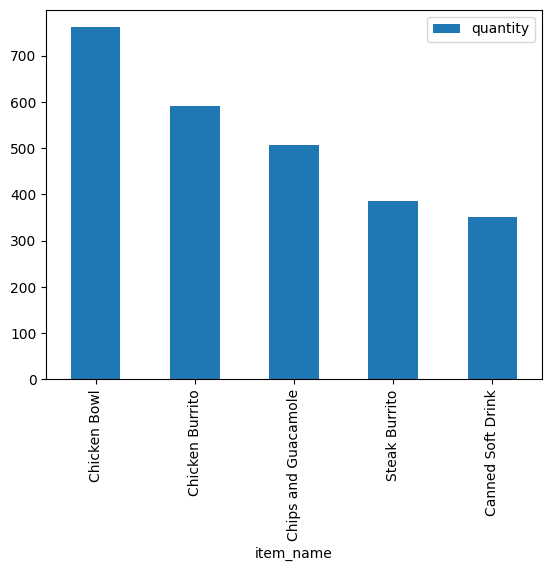

In [57]:
top5_bought = chipo[['quantity','item_name']].groupby('item_name').sum().sort_values(by='quantity',ascending = False)[:5]
top5_bought.plot(kind = 'bar')
plt.show()


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [62]:
chipo.item_price.head()

,item_price
0,$2.39
1,$3.39
2,$3.39
3,$2.39
4,$16.98


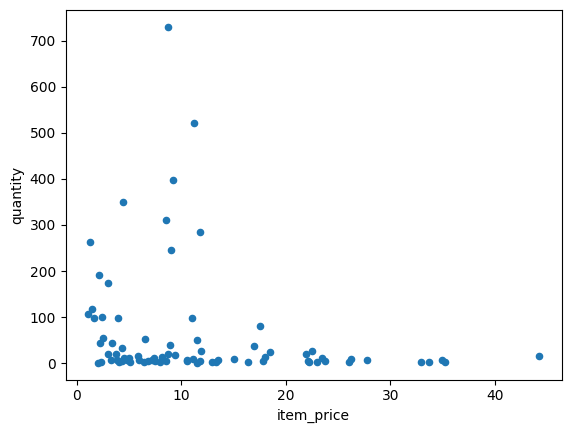

In [67]:
def toFloat(x):
  return float(x.strip()[1:])
chipo.item_price = chipo.item_price.apply(toFloat)
order_price = chipo[['quantity','item_price']].groupby('item_price').sum()

order_price.reset_index(inplace = True)

order_price.plot(x = 'item_price'
                 ,y = 'quantity',kind = 'scatter')
# plt.plot(data = order_price)
plt.show()


### Step 7. BONUS: Create a question and a graph to answer your own question.